<a href="https://colab.research.google.com/github/hevesikr/Project-1/blob/main/Eniac_sales_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [3]:
# Convert 'created_date' to datetime format
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])

# Set the 'created_date' as the index (optional, for convenience)
orders_qu.set_index('created_date', inplace=True)

# Resample to daily data (you can change to 'W' for weekly, 'M' for monthly, etc.)
# Calculate the daily average order price
avg_order_price_week= orders_qu.resample('W').agg({'total_paid': 'mean'}).reset_index()
avg_order_price_week

,created_date,total_paid
0,2017-01-01,174.867813
1,2017-01-08,127.690707
2,2017-01-15,127.419420
3,2017-01-22,136.729332
4,2017-01-29,133.860950
...,...,...
59,2018-02-18,152.233036
60,2018-02-25,182.436835
61,2018-03-04,179.098840
62,2018-03-11,185.544478


In [4]:
orderlines_products = orderlines_qu.merge(products_cl, how="left", on = "sku")
orderlines_products#.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404
...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230


In [5]:
orders_qu = orders_qu.reset_index()

In [6]:
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'])

In [7]:
# Merge orders with orderlines to get product info
merged = pd.merge(orderlines_products, orders_qu[['order_id', 'created_date']],
                  left_on='id_order', how='left',
                  right_on='order_id')

# Filter for orders from November 2017 and November 2018

# Original code:
merged['year_month'] = merged['created_date'].dt.to_period('M')  # Format as Year-Month
merged_nov_2017 = merged[merged['year_month'] == '2017-11']

#merged['year_month'] = merged['created_date'].dt.to_period('M')  # Format as Year-Month
#merged['week'] = merged['created_date'].dt.to_period('M').dt.start_time
#merged_nov_2017 = merged[merged['week'] == '2017-11']
#merged_nov_2018 = merged[merged['year_month'] == '2018-11']
#merged_nov_2018
# No useful data for 2018!

merged_nov_2017

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,order_id,created_date,year_month
19300,1313682,387100,0,1,PAC2187,976.83,2017-08-08 10:08:48,Pack Qnap TS-453b mini 4G NAS server 16TB (4x4...,NAS with HDMI 4K (3840x2160) output 4-core pro...,1195.09,0,12175397,387100,2017-11-24 18:51:50,2017-11
21285,1328778,394580,0,1,SAT0017,30.35,2017-08-30 14:07:28,Sonic Dual Conical Satechi Mac v2.0 Speakers W...,Speakers matte finish sleek design and volume ...,39.99,1,5398,394580,2017-11-23 19:49:28,2017-11
21737,1345518,396698,0,1,TWS0093,56.99,2017-09-05 12:45:50,Twelve South BookArc support for MacBook Pro /...,Aluminum support in an arc Retina MacBook Air.,59.99,0,8696,396698,2017-11-09 10:47:23,2017-11
21822,1346515,397180,0,1,PAC0337,717.37,2017-09-06 20:04:57,OWC Mercury Elite Pro QX2 Quad + 16TB,RAID system Mac and PC 4 bays eSata / FW800 / ...,894.95,0,11935397,397180,2017-11-10 14:15:06,2017-11
22400,1353909,400776,0,1,APP1190,51.00,2017-09-16 17:13:00,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231,400776,2017-11-22 22:35:15,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35927,1470649,452965,0,1,APP1190,51.00,2017-11-30 23:48:41,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231,452965,2017-11-30 23:50:49,2017-11
35928,1470656,452961,0,1,OTT0175,19.99,2017-11-30 23:53:26,Otterbox Clearly Protected Alpha Glass Screen ...,Screen saver fortified anti-scratch glass for ...,24.99,1,13555403,452961,2017-11-30 23:58:11,2017-11
37299,1490855,449025,0,1,APP1967,459.65,2017-12-12 12:35:16,Apple iPhone SE 128GB Silver,New iPhone screen 4-inch 128 GB free.,529.00,1,51601716,449025,2017-11-27 18:23:35,2017-11
38780,1504473,438611,0,1,BEL0269,48.44,2017-12-19 10:37:51,Belkin RockStar MIXIT Power Bank 10000 mAh Ext...,Portable external battery compartment for cabl...,99.99,0,1515,438611,2017-11-24 12:37:59,2017-11


In [8]:
# total orders in November 2018
total_november_2017 = merged_nov_2017.groupby('created_date').agg(total_sold=('id_order', 'count')).reset_index()

total_november_2017

,created_date,total_sold
0,2017-11-01 00:02:01,1
1,2017-11-01 00:46:35,1
2,2017-11-01 01:06:19,1
3,2017-11-01 04:16:38,1
4,2017-11-01 04:43:47,1
...,...,...
6228,2017-11-30 23:26:30,1
6229,2017-11-30 23:45:26,1
6230,2017-11-30 23:49:13,2
6231,2017-11-30 23:50:49,1


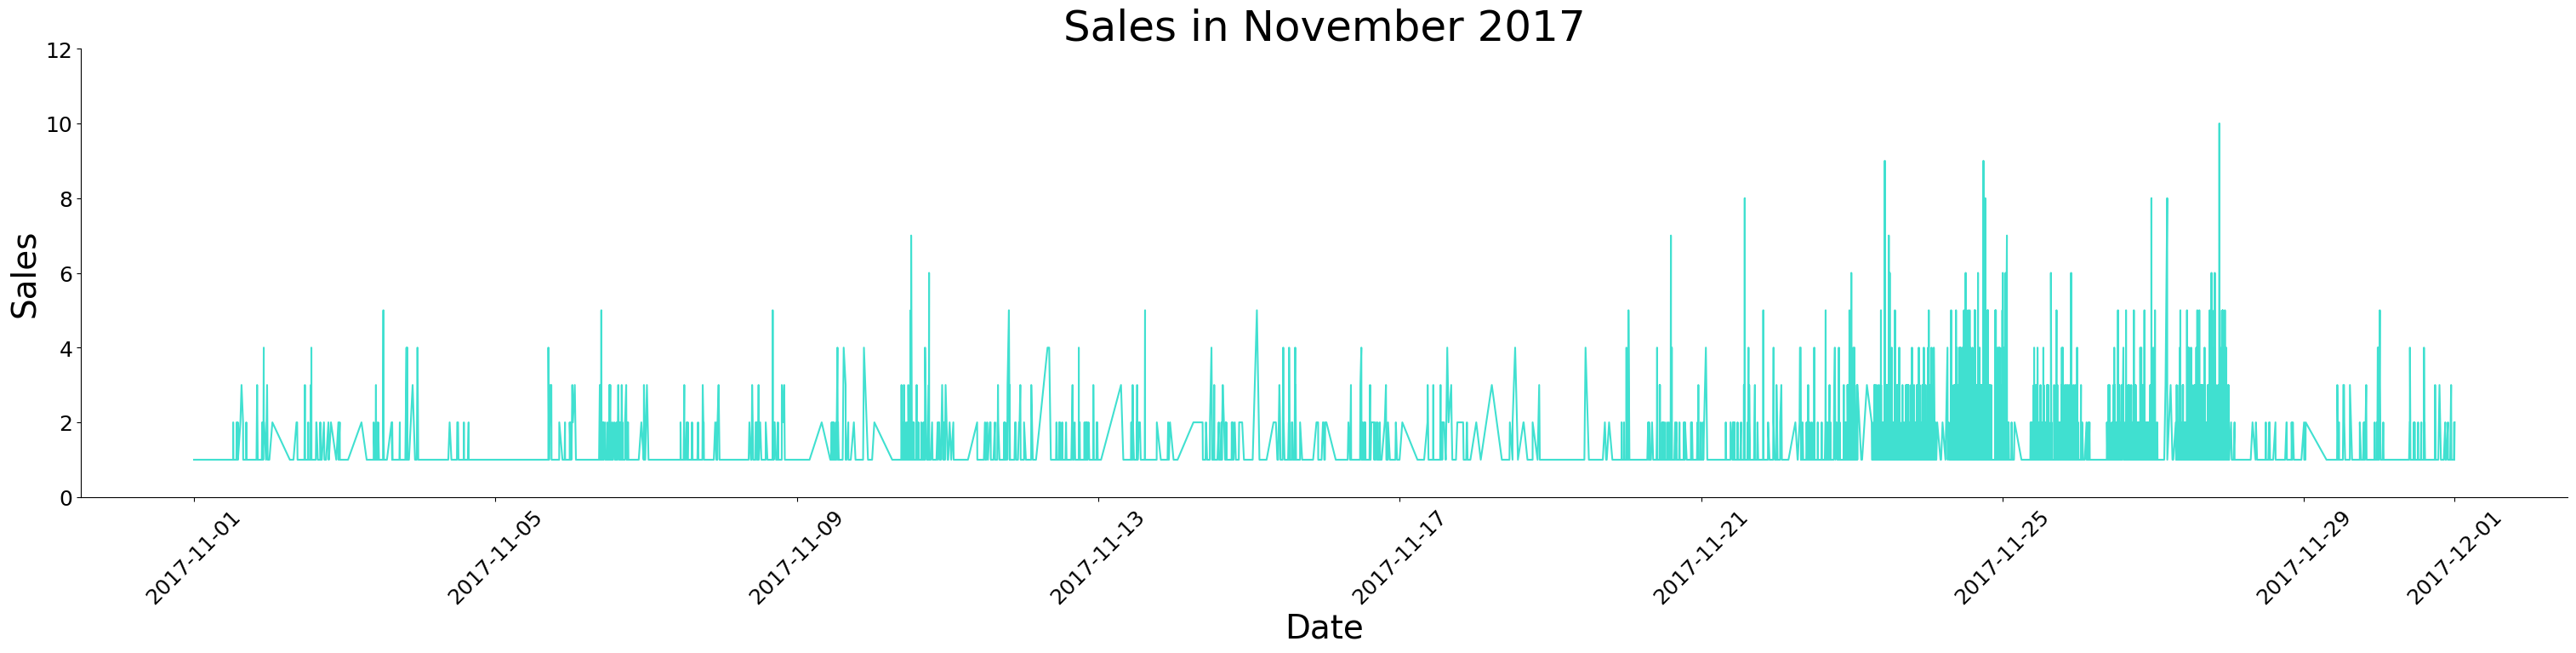

In [9]:
november_sales_2017= sns.relplot(total_november_2017, x='created_date',
            y='total_sold', kind='line',color='turquoise',
            height=6, aspect=5
            )
#december_sales_2017.set(title="Sales in November 2017", xlabel="Date", ylabel="Sales")
november_sales_2017.ax.set_title("Sales in November 2017", fontsize=36)
november_sales_2017.set_axis_labels("Date", "Sales", fontsize=28);
november_sales_2017.set_xticklabels(rotation=45, fontsize=18)
november_sales_2017.set_yticklabels(fontsize=18);

In [10]:
from google.colab import files
november_sales_2017.savefig("november_sales_2017.png")
files.download("november_sales_2017.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
merged['year_month'] = merged['created_date'].dt.to_period('M')  # Format as Year-Month
merged_dec_2017 = merged[merged['year_month'] == '2017-12']
total_december_2017 = merged_dec_2017.groupby('created_date').agg(total_sold=('id_order', 'count')).reset_index()
#total_november_2017= merged_nov_2017.resample('W').agg({'id_order': 'count'}).reset_index()
total_december_2017


,created_date,total_sold
0,2017-12-01 00:12:06,1
1,2017-12-01 00:15:39,1
2,2017-12-01 00:28:29,1
3,2017-12-01 00:33:25,1
4,2017-12-01 08:29:32,1
...,...,...
4849,2017-12-31 22:10:34,1
4850,2017-12-31 22:18:32,1
4851,2017-12-31 22:41:57,1
4852,2017-12-31 23:38:02,3


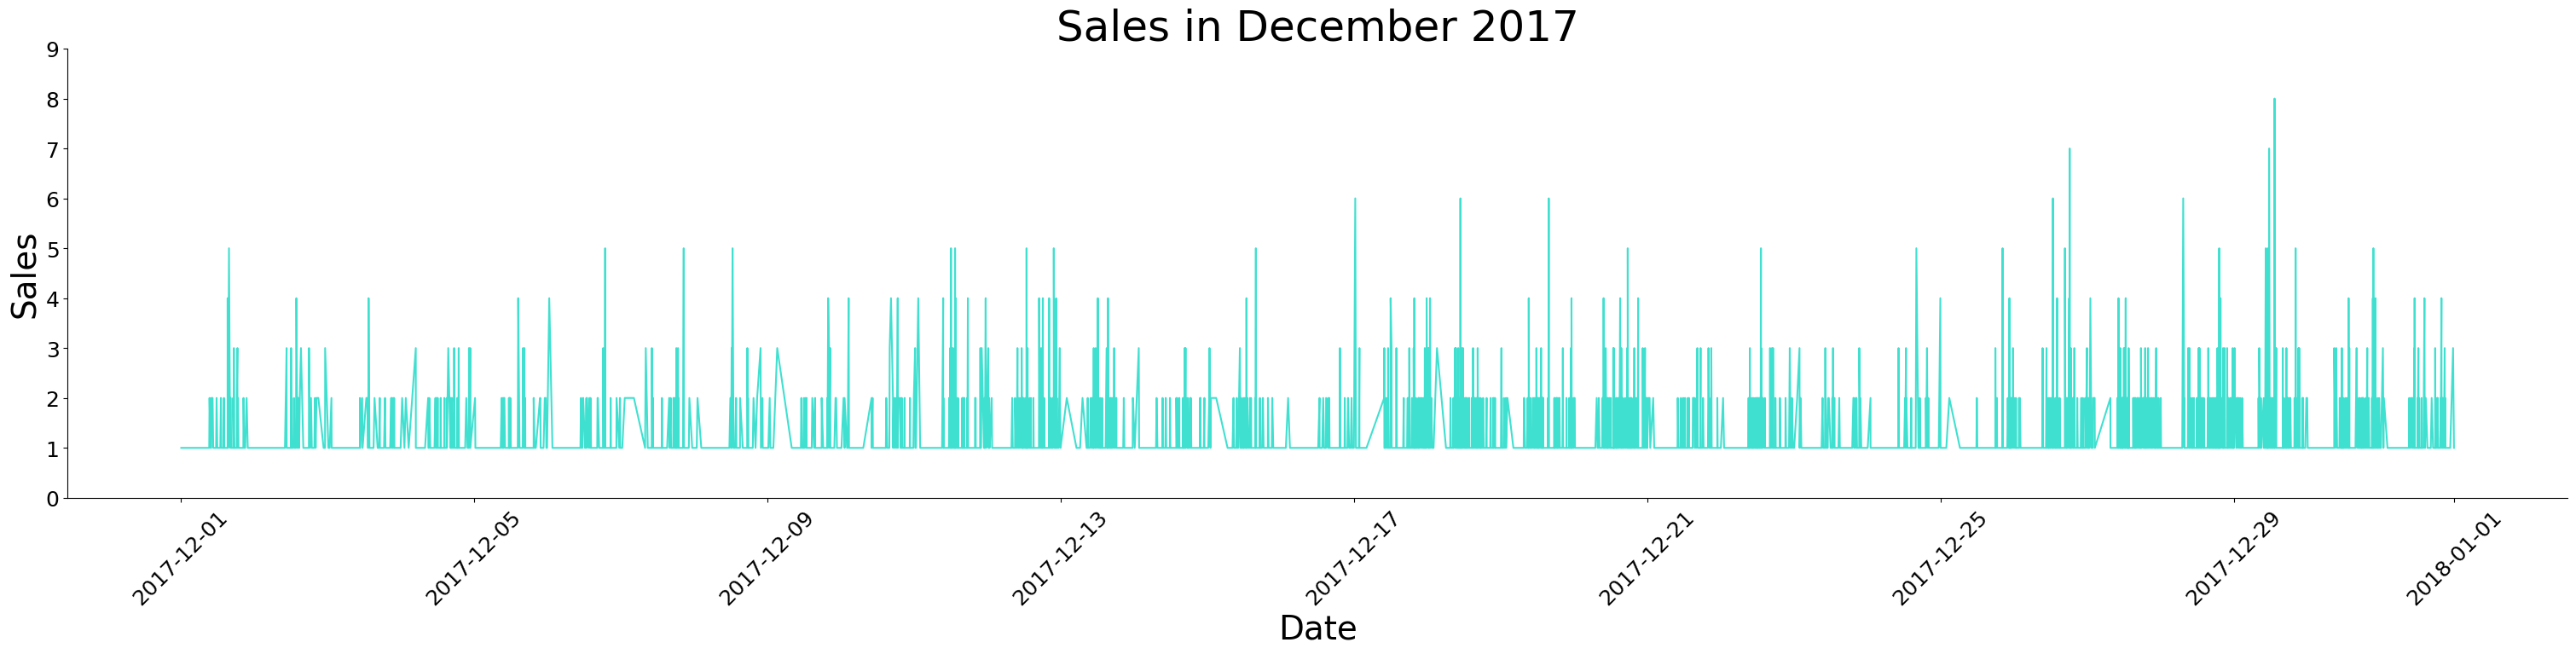

In [12]:
december_sales_2017= sns.relplot(total_december_2017, x='created_date',
            y='total_sold', kind='line',color='turquoise',
            height=6, aspect=5
            )
#december_sales_2017.set(title="Sales in December 2017", xlabel="Date", ylabel="Sales")
december_sales_2017.ax.set_title("Sales in December 2017", fontsize=36)
december_sales_2017.set_axis_labels("Date", "Sales", fontsize=28);
december_sales_2017.set_xticklabels(rotation=45, fontsize=18)
december_sales_2017.set_yticklabels(fontsize=18);

In [13]:
from google.colab import files
december_sales_2017.savefig("december_sales_2017.png")
files.download("december_sales_2017.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Filter for the complete year of 2017
merged_2017 = merged[merged['created_date'].dt.year == 2017]

# Add a 'week' column (using start of week for plotting)
merged_2017['week'] = merged_2017['created_date'].dt.to_period('W').dt.start_time

# Aggregate weekly sales
total_2017_weekly = (
    merged_2017.groupby('week')
    .agg(total_sold=('id_order', 'sum'))
    .reset_index()
)

total_2017_weekly


/tmp/ipython-input-4116150811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_2017['week'] = merged_2017['created_date'].dt.to_period('W').dt.start_time


,week,total_sold
0,2016-12-26,36264017
1,2017-01-02,423804335
2,2017-01-09,472276592
3,2017-01-16,364691698
4,2017-01-23,381748525
5,2017-01-30,340993282
6,2017-02-06,249729613
7,2017-02-13,309974719
8,2017-02-20,110467318
9,2017-02-27,14550047


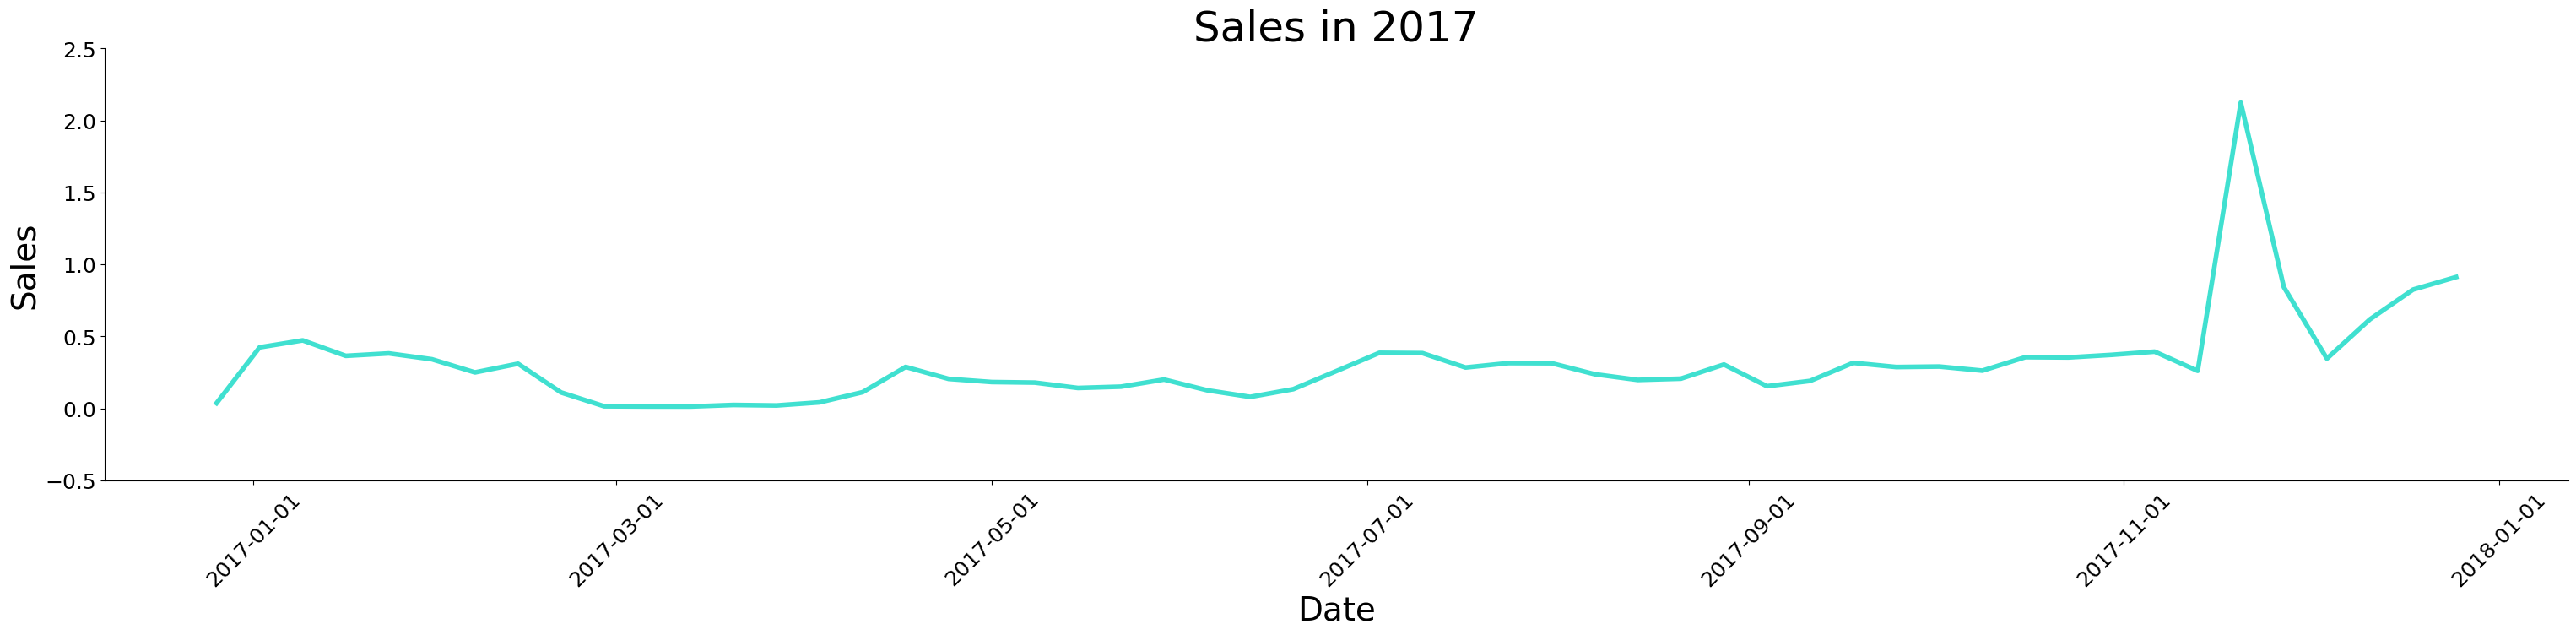

In [15]:
sales_2017= sns.relplot(total_2017_weekly, x='week',
            y='total_sold', kind='line',color='turquoise',
            height=6, aspect=5, linewidth = 4
            )

sales_2017.ax.set_title("Sales in 2017",
                     fontsize=36)
sales_2017.set_axis_labels("Date", "Sales", fontsize=28);
sales_2017.set_xticklabels(rotation=45, fontsize=18)
sales_2017.set_yticklabels(fontsize=18);

#Force to start with 0.

In [16]:
from google.colab import files
sales_2017.savefig("sales_2017.png")
files.download("sales_2017.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>